# <b> Multiple Linear Regression using RFE Approach

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [65]:
# Importing the DataSet into Python environment
rfe_df=pd.read_csv('CarPrice_Assignment.csv')

In [66]:
# Checking the numerical information about the dataset like minimum value counts mean std etc.
rfe_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [67]:
# Basic information about the columns in the dataframe like number of non null entries and 
# no. of rows and columns and its respective datatypes
rfe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [68]:
# Number of rows and columns in the dataset before cleaning.
rfe_df.shape

(205, 26)

In [69]:
# Name of columns in the dataset
rfe_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')

In [70]:
# Column datatype in the dataset
rfe_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [71]:
# No. of columns with null values
rfe_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [72]:
# Swapping price column position. Brought 'Price to the first position and moved the 'car_ID' column to the last position.'
rfe_df=rfe_df[['price', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','car_ID']]
rfe_df[['companyname','modelname']] = rfe_df.CarName.str.split(' ',1,expand=True)

In [73]:
# Correcting column values with correct spelling in dataframe - Part of Data Cleansing
pd.unique(rfe_df.companyname)

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [74]:
# Replacing the wrong company name with correct name
rfe_df.companyname=rfe_df.companyname.replace(to_replace =["vokswagen","vw"],value ="volkswagen")
rfe_df.companyname=rfe_df.companyname.replace(to_replace ="maxda",value ="mazda")
rfe_df.companyname=rfe_df.companyname.replace(to_replace ="Nissan",value ="nissan")
rfe_df.companyname=rfe_df.companyname.replace(to_replace ="toyouta",value ="toyota")
rfe_df.companyname=rfe_df.companyname.replace(to_replace ="porcshce",value ="porsche")

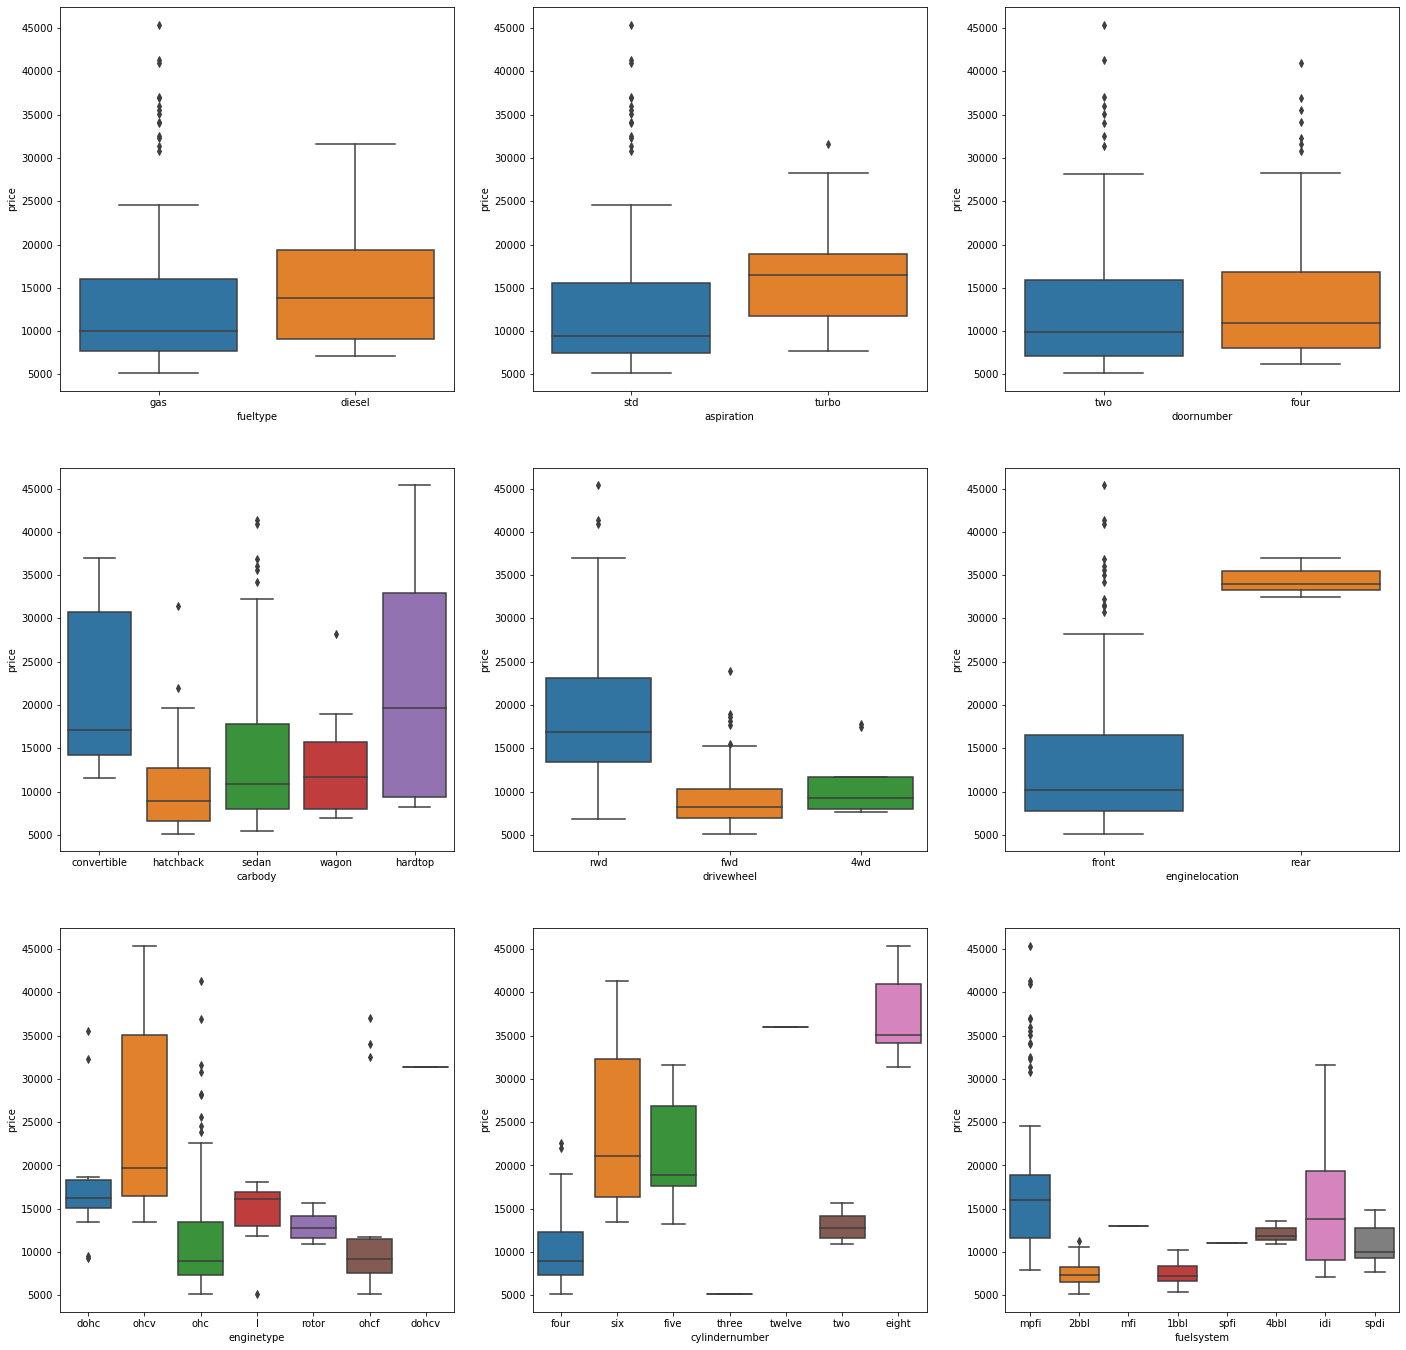

In [75]:
# Observing the impact of the categorical variable on the car prices
fig,ax=plt.subplots(ncols=3,nrows=3,figsize=(24,24))
sns.boxplot(x='fueltype',y='price',data=rfe_df,ax=ax[0][0])
sns.boxplot(x='aspiration',y='price',data=rfe_df,ax=ax[0][1])
sns.boxplot(x='doornumber',y='price',data=rfe_df,ax=ax[0][2])
sns.boxplot(x='carbody',y='price',data=rfe_df,ax=ax[1][0])
sns.boxplot(x='drivewheel',y='price',data=rfe_df,ax=ax[1][1])
sns.boxplot(x='enginelocation',y='price',data=rfe_df,ax=ax[1][2])
sns.boxplot(x='enginetype',y='price',data=rfe_df,ax=ax[2][0])
sns.boxplot(x='cylindernumber',y='price',data=rfe_df,ax=ax[2][1])
sns.boxplot(x='fuelsystem',y='price',data=rfe_df,ax=ax[2][2])
plt.show()

In [76]:
# Checking the correlation using Corr function as an alternative to HeatMap.
round(rfe_df.corr(),2)

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_ID
price,1.00,-0.08,0.58,0.68,0.76,0.12,0.84,0.87,0.55,0.08,0.07,0.81,-0.09,-0.69,-0.70,-0.11
symboling,-0.08,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.15
wheelbase,0.58,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.13
carlength,0.68,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.17
carwidth,0.76,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.05
carheight,0.12,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.26
curbweight,0.84,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.07
enginesize,0.87,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,-0.03
boreratio,0.55,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.26
stroke,0.08,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,-0.16


# 1. Reading, Understanding and Visualizing the data.

In [77]:
# Categorical Columns: Fetching columns which are in string/Object/Categorical form
for i in rfe_df.columns:
    if i not in ('car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'):
        print(i)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem
companyname
modelname


# 2. Preparing the Data

#### Encoding and creating dummy variables

In [78]:
# Encoding categorical variables which have only 2 values with 0 and 1.
rfe_df.fueltype = rfe_df.fueltype.map({"gas":0,"diesel":1})
rfe_df.aspiration = rfe_df.aspiration.map({"std":0,"turbo":1})
rfe_df.enginelocation = rfe_df.enginelocation.map({"front":0,"rear":1})
rfe_df.doornumber = rfe_df.doornumber.map({"two":0,"four":1})

In [79]:
# Dummy Encoding categorical variables which have more than 2 values using pd.dummies function.
carbody=pd.get_dummies(rfe_df['carbody'],drop_first=True)
drivewheel=pd.get_dummies(rfe_df['drivewheel'],drop_first=True)
enginetype=pd.get_dummies(rfe_df['enginetype'],drop_first=True)
cylindernumber=pd.get_dummies(rfe_df['cylindernumber'],drop_first=True)
fuelsystem=pd.get_dummies(rfe_df['fuelsystem'],drop_first=True)
companyname=pd.get_dummies(rfe_df['companyname'],drop_first=True)

In [80]:
# Dropping original columns after dummy columns have been created
rfe_df.drop(['carbody','fuelsystem','cylindernumber','enginetype','drivewheel','CarName','car_ID','modelname'],axis=1,inplace=True)

In [81]:
# Merging dummy columns with the original Dataset using concat function   
rfe_df=pd.concat([rfe_df,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,companyname],axis=1)

In [82]:
# List of columns after performing Dummy Encoding
rfe_df.columns

Index(['price', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'companyname', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [83]:
# Total number of columns after dummy encoding and merging the data.
rfe_df.drop(['companyname'],axis=1,inplace=True)
rfe_df.shape

(205, 65)

In [84]:
# Spliting dataframe into Train and Test in 70:30 Ratio respectively.
rfe_df_train,rfe_df_test=train_test_split(rfe_df,train_size=0.7,random_state=100)
print('Train Data:',rfe_df_train.shape)
print('Test Data:',rfe_df_test.shape)

Train Data: (143, 65)
Test Data: (62, 65)


In [85]:
# Storing the numeric columns of test data for MinMaxScaling i.e. normalizing into a variable
rfe_numeric_vars_test=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [86]:
# Storing all the numeric columns of train data for MinMaxScaling i.e. normalizing into a variable
rfe_numeric_vars_train=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

### Rescaling the Features

- It is done in order to keep all columns value in same scale
- There are basically 2 methods: <br>
 <b> 1) Normalisation (Min-Max Scaling) <br>
 <b> 2) Standardisation

In [87]:
# Importing the minmaxscaler package for normalisation
from sklearn.preprocessing import MinMaxScaler

In [88]:
# Instantiating an object of MinMaxScaler Class.
rfe_scaler=MinMaxScaler()

In [89]:
# Fitting Train Data on Numeric Data
rfe_df_train[rfe_numeric_vars_train]=rfe_scaler.fit_transform(rfe_df_train[rfe_numeric_vars_train])

In [90]:
# Instantiating an object of MinMaxScaler Class for test data.
rfe_scaler1=MinMaxScaler()

In [91]:
# Fitting Train Data on Numeric Data
rfe_df_test[rfe_numeric_vars_test]=rfe_scaler1.fit_transform(rfe_df_test[rfe_numeric_vars_test])

In [92]:
# Displaying the normalised data after performin MinMaxScaling
rfe_df_test.head()

,price,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,0.058474,0.4,0,0,1,0,0.265306,0.341732,0.200000,0.346154,0.132148,0.082969,0.515873,0.524590,0.12500,0.116129,0.265306,1.000000,1.000000,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,0.077398,0.8,0,0,1,0,0.311953,0.426772,0.315789,0.605769,0.219125,0.131004,0.515873,0.726776,0.12500,0.212903,0.448980,0.541667,0.580645,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,0.086148,0.6,0,0,0,0,0.355685,0.522835,0.421053,0.413462,0.271985,0.187773,0.674603,0.721311,0.10000,0.206452,0.265306,0.500000,0.516129,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,0.097473,0.6,0,0,0,0,0.230321,0.379528,0.157895,0.307692,0.214320,0.082969,0.555556,0.551913,0.15000,0.387097,1.000000,0.500000,0.419355,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,0.055099,0.8,0,0,0,0,0.195335,0.200000,0.136842,0.605769,0.202307,0.126638,0.857143,0.311475,0.10625,0.135484,0.102041,0.500000,0.483871,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Defining the X-Axis and Y-Axis of the Train Data.

In [93]:
# Creating TRAIN data after removing the price for X-Train and preparing Y-Train by filling price into it
rfe_df_y_train=rfe_df_train.pop('price')
rfe_df_X_train=rfe_df_train

In [94]:
# Importing statsmodels.api to add constant on train data
import statsmodels.api as sm

In [95]:
# Check for the VIF values of the feature variables. Therefore importing the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [97]:
# Running RFE with the output number of the variable equal to 10
rfe_lm = LinearRegression()
rfe_lm.fit(rfe_df_X_train, rfe_df_y_train)
# Running RFE
rfe = RFE(rfe_lm, 10)
rfe = rfe.fit(rfe_df_X_train, rfe_df_y_train)

In [98]:
# Displaying n columns according to its rank decided by the RFE
list(zip(rfe_df_X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 47),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('fwd', False, 54),
 ('rwd', False, 41),
 ('dohcv', False, 12),
 ('l', False, 7),
 ('ohc', False, 55),
 ('ohcf', False, 10),
 ('ohcv', False, 40),
 ('rotor', False, 3),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 29),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 46),
 ('4bbl', False, 34),
 ('idi', False, 24),
 ('mfi', False, 48),
 ('mpfi', False, 36),
 ('spdi', False

In [99]:
# Displaying the Top n Coluns suggested by RFE.
rfe_col = rfe_df_X_train.columns[rfe.support_]
rfe_col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'three', 'twelve', 'two', 'bmw', 'porsche'], dtype='object')

In [100]:
# Displaying Columns which were not considered in Top n linear model variables
rfe_df_X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

### Building model using statsmodel, for the detailed statistics

#### First Model

In [101]:
# Creating X_test dataframe with RFE selected variables
rfe_df_X_train = rfe_df_X_train[rfe_col]
# Adding a constant variable 
import statsmodels.api as sm  
rfe_df_X_train = sm.add_constant(rfe_df_X_train)
# Running the linear model
rfe_lm = sm.OLS(rfe_df_y_train,rfe_df_X_train).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           1.21e-64
Time:                        16:24:27   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1594      0.019     -8.

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
rfe_vif = pd.DataFrame()
rfe_vif['Features'] = rfe_df_X_train.columns
rfe_vif['VIF'] = [variance_inflation_factor(rfe_df_X_train.values, i) for i in range(rfe_df_X_train.shape[1])]
rfe_vif['VIF'] = round(rfe_vif['VIF'], 2)
rfe_vif = rfe_vif.sort_values(by = "VIF", ascending = False)
rfe_vif

,Features,VIF
0,const,11.19
3,curbweight,9.26
4,enginesize,7.23
2,carwidth,4.92
5,boreratio,1.85
10,porsche,1.82
1,enginelocation,1.66
7,twelve,1.49
8,two,1.24
9,bmw,1.13


In [103]:
# Dropping highly correlated variables and insignificant variables
rfe_df_X_train= rfe_df_X_train.drop('twelve', 1,)

#### Second Model

In [104]:
# Adding a constant variable 
rfe_df_X_train_addconst1 = sm.add_constant(rfe_df_X_train)
# Running the linear model
rfe_lm1 = sm.OLS(rfe_df_y_train,rfe_df_X_train_addconst1).fit()
print(rfe_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           1.18e-65
Time:                        16:24:28   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1587      0.018     -8.

In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
rfe_vif1 = pd.DataFrame()
rfe_vif1['Features'] = rfe_df_X_train.columns
rfe_vif1['VIF'] = [variance_inflation_factor(rfe_df_X_train.values, i) for i in range(rfe_df_X_train.shape[1])]
rfe_vif1['VIF'] = round(rfe_vif1['VIF'], 2)
rfe_vif1 = rfe_vif1.sort_values(by = "VIF", ascending = False)
rfe_vif1

,Features,VIF
0,const,11.15
3,curbweight,8.64
4,enginesize,5.13
2,carwidth,4.91
5,boreratio,1.85
9,porsche,1.80
1,enginelocation,1.65
7,two,1.17
8,bmw,1.09
6,three,1.05


In [106]:
rfe_df_X_train= rfe_df_X_train.drop('three', 1,)

#### Third Model

In [107]:
# Adding a constant variable 
rfe_df_X_train_addconst2 = sm.add_constant(rfe_df_X_train)
# Running the linear model
rfe_lm2 = sm.OLS(rfe_df_y_train,rfe_df_X_train_addconst2).fit()
print(rfe_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           2.55e-65
Time:                        16:24:28   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1478      0.018     -8.

In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
rfe_vif2 = pd.DataFrame()
rfe_vif2['Features'] = rfe_df_X_train.columns
rfe_vif2['VIF'] = [variance_inflation_factor(rfe_df_X_train.values, i) for i in range(rfe_df_X_train.shape[1])]
rfe_vif2['VIF'] = round(rfe_vif2['VIF'], 2)
rfe_vif2 = rfe_vif2.sort_values(by = "VIF", ascending = False)
rfe_vif2

,Features,VIF
0,const,10.59
3,curbweight,8.62
4,enginesize,5.13
2,carwidth,4.80
5,boreratio,1.85
8,porsche,1.80
1,enginelocation,1.65
6,two,1.17
7,bmw,1.09


In [109]:
rfe_df_X_train= rfe_df_X_train.drop('curbweight', 1,)

#### Fourth Model

In [110]:
# Adding a constant variable 
rfe_df_X_train_addconst3 = sm.add_constant(rfe_df_X_train)
# Running the linear model
rfe_lm3 = sm.OLS(rfe_df_y_train,rfe_df_X_train_addconst3).fit()
print(rfe_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           4.55e-63
Time:                        16:24:28   Log-Likelihood:                 178.67
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     135   BIC:                            -317.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1667      0.019     -8.

In [111]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
rfe_vif3 = pd.DataFrame()
rfe_vif3['Features'] = rfe_df_X_train.columns
rfe_vif3['VIF'] = [variance_inflation_factor(rfe_df_X_train.values, i) for i in range(rfe_df_X_train.shape[1])]
rfe_vif3['VIF'] = round(rfe_vif3['VIF'], 2)
rfe_vif3 = rfe_vif3.sort_values(by = "VIF", ascending = False)
rfe_vif3

,Features,VIF
0,const,9.92
3,enginesize,3.11
2,carwidth,3.00
4,boreratio,1.70
7,porsche,1.66
1,enginelocation,1.64
5,two,1.14
6,bmw,1.09


In [112]:
rfe_df_X_train= rfe_df_X_train.drop('boreratio', 1,)

#### Fifth Model

In [113]:
# Adding a constant variable 
rfe_df_X_train_addconst4 = sm.add_constant(rfe_df_X_train)
# Running the linear model
rfe_lm4 = sm.OLS(rfe_df_y_train,rfe_df_X_train_addconst4).fit()
print(rfe_lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           1.55e-63
Time:                        16:24:29   Log-Likelihood:                 176.97
No. Observations:                 143   AIC:                            -339.9
Df Residuals:                     136   BIC:                            -319.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1818      0.017    -10.

In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
rfe_vif4 = pd.DataFrame()
rfe_vif4['Features'] = rfe_df_X_train.columns
rfe_vif4['VIF'] = [variance_inflation_factor(rfe_df_X_train.values, i) for i in range(rfe_df_X_train.shape[1])]
rfe_vif4['VIF'] = round(rfe_vif4['VIF'], 2)
rfe_vif4 = rfe_vif4.sort_values(by = "VIF", ascending = False)
rfe_vif4

,Features,VIF
0,const,7.95
3,enginesize,3.02
2,carwidth,2.77
1,enginelocation,1.64
6,porsche,1.59
4,two,1.13
5,bmw,1.09


In [115]:
rfe_df_X_train= rfe_df_X_train.drop('porsche', 1,)

#### Sixth Model

In [116]:
# Adding a constant variable 
rfe_df_X_train_addconst5 = sm.add_constant(rfe_df_X_train)
# Running the linear model
rfe_lm5 = sm.OLS(rfe_df_y_train,rfe_df_X_train_addconst5).fit()
print(rfe_lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           3.81e-64
Time:                        16:24:29   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1870      0.017    -11.

In [117]:
rfe_df_X_train= rfe_df_X_train.drop(['const'],axis=1)

In [118]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
rfe_vif4 = pd.DataFrame()
rfe_vif4['Features'] = rfe_df_X_train.columns
rfe_vif4['VIF'] = [variance_inflation_factor(rfe_df_X_train.values, i) for i in range(rfe_df_X_train.shape[1])]
rfe_vif4['VIF'] = round(rfe_vif4['VIF'], 2)
rfe_vif4 = rfe_vif4.sort_values(by = "VIF", ascending = False)
rfe_vif4

,Features,VIF
2,enginesize,9.98
1,carwidth,9.63
3,two,1.16
4,bmw,1.13
0,enginelocation,1.08


#### Residual Analysis for the Test Set

In [119]:
y_train_price = rfe_lm5.predict(rfe_df_X_train_addconst5)

Text(0.5, 0, 'Errors')

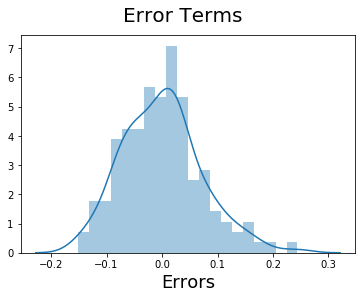

In [120]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((rfe_df_y_train- y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Predictions Using the Final Model

#### Dividing Test Data into X_test and y_test

In [121]:
y_test = rfe_df_test.pop('price')
X_test = rfe_df_test

In [122]:
X_test_m4 = X_test.drop(['symboling','fueltype', 'aspiration', 'doornumber',
                         'wheelbase', 'carlength', 'carheight', 'curbweight', 
                        'boreratio', 'stroke', 'compressionratio', 'horsepower', 
                         'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
                         'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv' ,'rotor', 'five', 
                         'four', 'six', 'three', 'twelve', '2bbl', '4bbl', 'idi', 'mfi', 
                         'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 
                         'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 
                         'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 
                         'volkswagen', 'volvo'],axis=1)

In [123]:
X_test_m4 = sm.add_constant(X_test_m4)
lm6=sm.OLS(y_test,X_test_m4).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           2.28e-28
Time:                        16:24:30   Log-Likelihood:                 81.829
No. Observations:                  62   AIC:                            -153.7
Df Residuals:                      57   BIC:                            -143.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0759      0.018     -4.

### Making predictions

In [124]:
y_pred = rfe_lm5.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

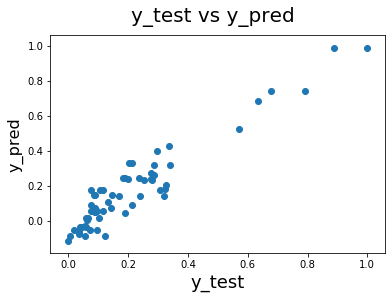

In [125]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 18) # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

We can see that the equation of our best fitted line is:

$ price = 0.4172 \times enginelocation + 0.3379  \times  carwidth + 0.6058 \times enginesize + 0.2075 \times bmw + 0 \times two $ 

# Calculating the R-squared score on the test set.

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8286146770148788